# Intro to Python exercises

These exercises extend material that was covered in today's lecture.

Please save the file as `intro-YOURNAME.ipynb` in the directory `ShenzhenWinterCamp/Natasha/Homework1`

When you are finished, the Jupyter notebook file should be submitted to the GitHub repository with a pull request.

My email is [tashawatkins@gmail.com](mailto:tashawatkins@gmail.com) if you require any assistance or further clarification.

## Reading: Python essentials

It's important that you have a solid understanding of data types and functions for later lectures.

Please read QuantEcon's Python Essentials: https://lectures.quantecon.org/py/python_essentials.html

Complete exercise 1 through 5 below - you may check your answers but please attempt the question before checking!

** Exercise 1 **

Part 1: Given two numeric lists or tuples x_vals and y_vals of equal length, compute their inner product using zip()

Part 2: In one line, count the number of even numbers in 0,...,99

Hint: x % 2 returns 0 if x is even, 1 otherwise

Part 3: Given pairs = ((2, 5), (4, 2), (9, 8), (12, 10)), count the number of pairs (a, b) such that both a and b are even

In [27]:
#Part 1 
x = [x for x in range(100)]      # Use list expression to generate a new list
y = [y for y in range(100,200)]
print (len(x) == len(y))         #compare the length of two lists
print (sum(x*y for x,y in zip(x,y))) #zip function returns [(x0,y0),(x1,y1),...,(x99,y99)]

True
823350


In [31]:
# Part 2 
print (sum([x % 2 == 0 for x in range(100)]))

50


In [70]:
# Part 3 
pairs = ((2,5),(4,2),(9,8),(12,10))
sum([(x%2==0 and y%2==0) for x,y in pairs]) # both x and y should be even number


2

# ** Exercise 2 **

Consider the polynomial

(1)

p(x)=a0+a1x+a2x2+⋯anxn=∑i=0naixi
Write a function p such that p(x, coeff) that computes the value in (1) given a point x and a list of coefficients coeff

Try to use enumerate() in your loop

In [71]:
enumerate?

In [101]:
#the solution 1
import numpy as np
def p(x,coeff):  # coeff should be a list
    y = []
    for i in range(len(coeff)):
        if i == 0:
            val = coeff[0]
            y.append(val)
        else:
            val = coeff[i]* x**i 
            y.append(val)
    return sum(y)


In [102]:
coeff = [x for x in range(5)]
p(1,coeff)


10

In [97]:
#the solution 2
def p(x,coeff):
    return sum([a * x**i for i, a in enumerate(coeff)])
    #enumerate function returns tuple like (index,coeff[index])


In [98]:
coeff = [x for x in range(5)]
p(1,coeff)

10

** Exercise 3 **

In [114]:
def count(string):#input a string
    count = 0
    for i in string:
        for j in "ABCDEFGHIJKLMNOPQRSTUVWXYZ":
            if i == j:#compare letters in the given string with those Cap Ones
                count +=1
                break #if found, break the inner loop 
    return count
            

In [115]:
count('ABhJ')

3

** Exercise 4 **

In [117]:
def iselement(seq_a , seq_b):#almost the same with Ex4 the solution1
    for i in seq_a:
        for j in seq_b:
            if i == j:
                judge = True
                break
            else:
                judge = False
    return judge
            

In [118]:
iselement((1,2,3),(1,2))

False

In [119]:
iselement([1,2,3],[1,2,3])

True

** Exercise 5 **

In [126]:
def linapprox(f,a,b,n,x):
    for i in range(n):
        if x>a+i*(b-a)/n and x<a+(i+1)*(b-a)/n:#find the interval where x lies
            f_approx_at_x = f(a+i*(b-a)/n)*((i*(b-a)/n)/(b-a))\
                            +f(a+(i+1)*(b-a)/n)*(b-((i+1)*(b-a)/n+a)/(b-a))
                #linear prediction of x 
        elif x==a+i*(b-a)/n:
            f_approx_at_x = f(a+i*(b-a)/n)
        elif x== a+(i+1)*(b-a)/n:
            f_approx_at_x = f(a+(i+1)*(b-a)/n)
    return f_approx_at_x

In [127]:
def f(m):
    return 2*m+2

linapprox(f,0,2,4,1.5)

5.0

In [121]:
int(3.6)

3

## For loops

** Exercise:** write a function `factorial` which takes an argument `n` and returns n! (the factorial of n)

$$
n! = n \times (n - 1) \times (n - 2) \times \ldots \times 1
$$

In [46]:
def factorial(n):
    if n >= 1:   #while n = 0, it is a special case, 'cause 0!=1 in Maths
        initial = 1
        rng = range(1,n+1) #set the range, notice the beginning is 1 now
        for x in rng:
            initial = initial*x #loop to calculate 1*2*...*n
        return initial
    else:
        return 1

In [47]:
print(factorial(0))
print(factorial(1))
print(factorial(3))

1
1
6


## While loops

In addition to for loops, **while loops** can also be used for iteration

In [3]:
i = 10

while i > 1:
    print(i)
    i = i - 1  # Subtract 1 from i

10
9
8
7
6
5
4
3
2


** Exercise: ** Rewrite the `white_noise` function using a **while loop** instead of a **for loop**

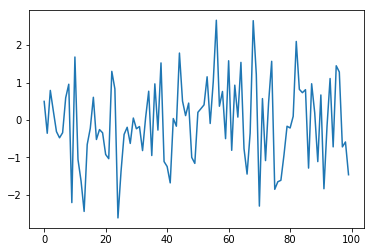

In [52]:
from random import normalvariate
import matplotlib.pyplot as plt

ts_length = 100
epsilon_values = []   # An empty list
i = 1                  # set the initial number as 1
while i <= 100:       # citerian of loop
    e = normalvariate(0, 1)   # Draw epsilon from normal distribution
    epsilon_values.append(e)  # Add random draw to list
    i += 1                    # iterate i
plt.plot(epsilon_values)
plt.show()

## Generate a time series

Consider the following autoregressive model (AR(1) model)

$$
y_{t+1} = \mu + \rho y_t + \varepsilon_t \quad \quad \varepsilon_t \sim (0, 1)
$$

Where:
* $\mu$ is the unconditional mean
* $\rho$ is the persistence parameter
* $\varepsilon_t$ is an i.i.d random shock

** Exercise: ** Write a function called `generate_AR1` that takes `mu`, `rho` and `T` as arguments
* `mu` and `rho` should be positional arguments
* `T` should be a keyword argument with a default value of 200
* Let $y_0 = 10$

The function should **return** a plot of the AR(1) series

Use your function to plot a time series of an AR(1) process where `mu = 5` and `rho = 0.8`

In [65]:
import random as rd
import matplotlib.pyplot as plt
def genearte_AR1(mu,rho,T=200):# mu and rho should be positive,rho should be less than 1 
    iter_result = [] #create an empty list to store data
    for i in range(T):
        if i == 0: #the initial y, which is y0 = 10
            y = 10
            iter_result.append(y)
        else:
            e = rd.normalvariate(0,1)   # generate random number
            y = mu + rho * iter_result[i-1] + e  #AR1 process
            iter_result.append(y)
    plt.plot(iter_result)  # plot the graph
    plt.show()
        

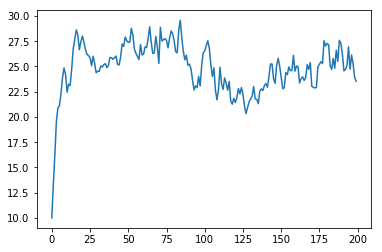

In [66]:
genearte_AR1(5,0.8)

** Exercise: ** Create an interactive plot using your `generate_AR1` function
* `mu` should take values between 0 and 10
* `rho` should take values between 0 and 0.99, with steps of 0.01

In [68]:
from ipywidgets import interact

interact(genearte_AR1, mu=(0,10),rho=(0,0.99,0.01))

<function __main__.genearte_AR1>